In [ ]:
# Import pandas
import pandas as pd

# Unggah file CSV
from google.colab import files
uploaded = files.upload()

# Membaca file CSV
df = pd.read_csv('newstext_indozone_bpjs.csv')

# Tampilkan kolom untuk memastikan kolom yang tersedia
print("Kolom yang tersedia:", df.columns)

Saving newstext_indozone_bpjs.csv to newstext_indozone_bpjs (1).csv
Kolom yang tersedia: Index(['title', 'url', 'text', 'date', 'tags'], dtype='object')


In [ ]:
df

,title,url,text,date,tags
0,Lansia di Jaksel Rugi Rp1 M Usai Jadi Korban P...,https://news.indozone.id/news/915064988/lansia...,INDOZONE.ID - Seorang lansia berinisial HS (75...,07-09-2024,"Bank, bank, lansia, polisi, penipuan, pegawai ..."
1,Respon Abdi Dalem Keraton Jogja Soal Wacana BP...,https://news.indozone.id/indonesia-hari-ini/91...,INDOZONE.ID - Salah satu warga Yogyakarta yang...,21-06-2024,"bpjs ketenagakerjaan, yogyakarta, abdi dalem, ..."
2,Alasan DPRD Kota Jogja Usulkan Abdi Dalem Dapa...,https://news.indozone.id/news/914774986/alasan...,INDOZONE.ID - Dewan Perwakilan Rakyat Daerah (...,19-06-2024,"DPRD Kota Yogyakarta, Keraton, dprd kota yogya..."
3,Iuran BPJS Kesehatan Bisa Dicairkan Jika Peser...,https://news.indozone.id/news/914726440/iuran-...,INDOZONE.ID - BPJS Kesehatan adalah program as...,05-06-2024,"BPJS Kesehatan, iuran bpjs kesehatan, peserta ..."
4,3 Cara Cetak Kartu BPJS Kesehatan Secara Onlin...,https://news.indozone.id/news/914724357/3-cara...,INDOZONE.ID - proses pencetakan kartu BPJS Kes...,04-06-2024,"kartu BPJS Kesehatan, Kartu BPJS Kesehatan, Ce..."
...,...,...,...,...,...
160,Begini Penjelasan Kemenkeu Soal Naiknya Tunjan...,https://news.indozone.id/news/911471884/begini...,Menteri Keuangan Sri Mulyani telah mengeluarka...,13-08-2019,"kemenkeu, BPJS, bpjs, iuran bpjs, Kemenkeu"
161,"BPJS Defisit, Sri Mulyani Justru Tambah Tunjan...",https://news.indozone.id/news/911471864/bpjs-d...,Di tengah kondisi keuangan BPJS Kesehatan yang...,13-08-2019,NaN
162,BPJS Ketenagakerjaan Tak Bisa Bantu Defisit BP...,https://news.indozone.id/news/911471195/bpjs-k...,"Dirut BPJS Ketenagakerjaan, Agus Susanto menga...",03-08-2019,NaN
163,Sri Mulyani Sebut Presiden Jokowi Minta BPJS K...,https://news.indozone.id/news/911470865/sri-mu...,Menteri Keuangan Sri Mulyani Indrawati mengata...,30-07-2019,NaN


In [ ]:
!pip install Sastrawi

Frekuensi Kata Sebelum Preprocessing: [('bpjs', 1016), ('yang', 983), ('kesehatan', 838), ('dan', 770), ('iuran', 505), ('ini', 490), ('di', 487), ('untuk', 470), ('dengan', 396), ('dari', 343), ('peserta', 324), ('tidak', 304), ('dalam', 293), ('itu', 284), ('pemerintah', 281), ('tersebut', 276), ('data', 272), ('kelas', 268), ('akan', 248), ('jaminan', 237)]


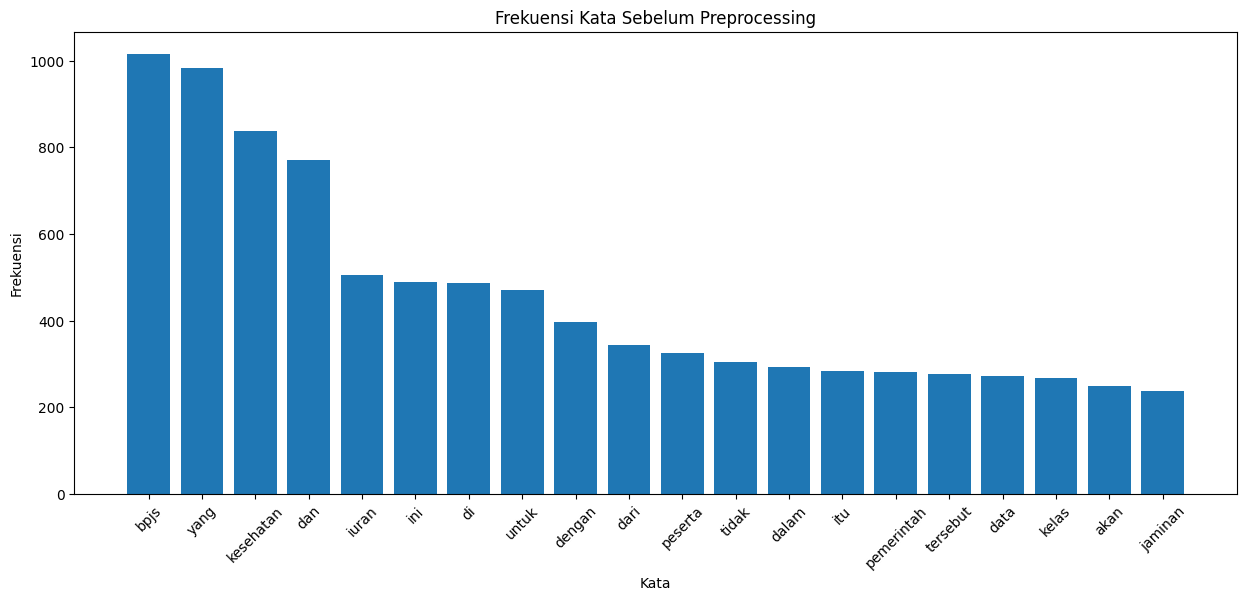

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# 1. Mengonversi teks ke huruf kecil
df['text_lower'] = df['text'].str.lower()

# 2. Menghitung frekuensi kata sebelum preprocessing
def preprocess_text(text):
    # Menghilangkan karakter selain huruf dan angka
    text = re.sub(r'\W', ' ', text)
    # Memisahkan kata-kata
    words = text.split()
    return words

# Menggabungkan semua teks menjadi satu string
all_words = ' '.join(df['text_lower'].tolist())

# Mendapatkan daftar kata-kata
word_list = preprocess_text(all_words)

# Menghitung frekuensi kata
word_freq = Counter(word_list)

# Menampilkan 20 kata yang paling sering muncul
common_words = word_freq.most_common(20)
print("Frekuensi Kata Sebelum Preprocessing:", common_words)

# 4. Visualisasi frekuensi kata sebelum preprocessing
# Membuat DataFrame untuk memvisualisasikan data
words_df = pd.DataFrame(common_words, columns=['Kata', 'Frekuensi'])

# Membuat plot frekuensi kata
plt.figure(figsize=(15,6))
plt.bar(words_df['Kata'], words_df['Frekuensi'])
plt.title('Frekuensi Kata Sebelum Preprocessing')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

Tokenisasi

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Mengunduh resource 'punkt'
nltk.download('punkt')

# Tokenisasi teks berita
df['text_tokenized'] = df['text_lower'].apply(word_tokenize)

# Menampilkan contoh hasil tokenisasi pada beberapa baris pertama
print(df[['text_lower', 'text_tokenized']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                          text_lower  \
0  indozone.id - seorang lansia berinisial hs (75...   
1  indozone.id - salah satu warga yogyakarta yang...   
2  indozone.id - dewan perwakilan rakyat daerah (...   
3  indozone.id - bpjs kesehatan adalah program as...   
4  indozone.id - proses pencetakan kartu bpjs kes...   

                                      text_tokenized  
0  [indozone.id, -, seorang, lansia, berinisial, ...  
1  [indozone.id, -, salah, satu, warga, yogyakart...  
2  [indozone.id, -, dewan, perwakilan, rakyat, da...  
3  [indozone.id, -, bpjs, kesehatan, adalah, prog...  
4  [indozone.id, -, proses, pencetakan, kartu, bp...  


Hapus stopwords

In [ ]:
# Import library yang dibutuhkan
from nltk.corpus import stopwords

# Download stopwords untuk bahasa Indonesia jika belum ada
nltk.download('stopwords')

# Inisialisasi stopwords bahasa Indonesia
stop_words = set(stopwords.words("indonesian"))

# Hapus stopwords dari kolom tokens
df['text_without_stopwords'] = df['text_tokenized'].apply(
    lambda x: [word for word in x if word not in stop_words and word.isalpha()]
)

# Tampilkan hasil penghapusan stopwords
print(df[['text_tokenized', 'text_without_stopwords']].head())


                                      text_tokenized  \
0  [indozone.id, -, seorang, lansia, berinisial, ...   
1  [indozone.id, -, salah, satu, warga, yogyakart...   
2  [indozone.id, -, dewan, perwakilan, rakyat, da...   
3  [indozone.id, -, bpjs, kesehatan, adalah, prog...   
4  [indozone.id, -, proses, pencetakan, kartu, bp...   

                              text_without_stopwords  
0  [lansia, berinisial, hs, jakarta, selatan, jak...  
1  [salah, warga, yogyakarta, abdi, dalem, kerato...  
2  [dewan, perwakilan, rakyat, daerah, dprd, kota...  
3  [bpjs, kesehatan, program, asuransi, kesehatan...  
4  [proses, pencetakan, kartu, bpjs, kesehatan, o...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stemming Sastrawi

In [ ]:
# Import library yang dibutuhkan
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks yang sudah ditokenisasi
def stem_text(text_tokens):
    return [stemmer.stem(word) for word in text_tokens]

# Melakukan stemming pada teks tanpa stopwords
df['text_stemmed'] = df['text_without_stopwords'].apply(stem_text)

# Menampilkan contoh hasil stemming
df.loc[:,['text_without_stopwords', 'text_stemmed']].head()

,text_without_stopwords,text_stemmed
0,"[lansia, berinisial, hs, jakarta, selatan, jak...","[lansia, inisial, hs, jakarta, selatan, jaksel..."
1,"[salah, warga, yogyakarta, abdi, dalem, kerato...","[salah, warga, yogyakarta, abdi, dalem, kerato..."
2,"[dewan, perwakilan, rakyat, daerah, dprd, kota...","[dewan, wakil, rakyat, daerah, dprd, kota, yog..."
3,"[bpjs, kesehatan, program, asuransi, kesehatan...","[bpjs, sehat, program, asuransi, sehat, sosial..."
4,"[proses, pencetakan, kartu, bpjs, kesehatan, o...","[proses, cetak, kartu, bpjs, sehat, online, mu..."


In [ ]:
# Tampilkan contoh sebelum dan sesudah stemming untuk teks berita full
for i in [0]:  # Ganti 0 dengan index baris yang ingin kamu tampilkan
    original_text = ' '.join(df['text_without_stopwords'].iloc[i])  # Menggabungkan token sebelum stemming
    stemmed_text = ' '.join(df['text_stemmed'].iloc[i])  # Menggabungkan token hasil stemming

    print(f"Original (Tanpa Stopwords): {original_text}")
    print(f"Stemmed (Setelah Stemming):  {stemmed_text}")
    print()


Original (Tanpa Stopwords): lansia berinisial hs jakarta selatan jaksel korban penipuan mengalami kerugian mencapai miliar pelaku aksinya modus pegawai bpjs polisi penipuan dialami korban kamis september penipuan korban menerima telepon pelaku kejadian korban dihubungi pelaku mengaku bpjs memberitahu bpjs milik korban transaksi terlarang kabid humas polda metro jaya kombes pol ade ary syam indradi wartawan sabtu korban dihubungi pelaku kali pelaku mengaku anggota kepolisian pelaku menghubungi korban mengaku petugas kepolisian polwiltabes bandung memberitahu saldo rekening korban hilang diambil mengarahkan korban mengganti pin ade ary korban mendapati saldo berkurang rekening bank cimb niaga sambungnya terkini ditangani polres metro jakarta selatan ditangani restro jaksel pungkasnya
Stemmed (Setelah Stemming):  lansia inisial hs jakarta selatan jaksel korban tipu alami rugi capai miliar laku aksi modus pegawai bpjs polisi tipu alami korban kamis september tipu korban terima telepon laku

In [ ]:
# Fungsi untuk menyatukan token yang sudah di-stem menjadi teks utuh
def join_tokens(tokens):
    return ' '.join(tokens)

# Menyimpan hasil join ke kolom baru
df['text_stemmed'] = df['text_stemmed'].apply(join_tokens)

# Menampilkan contoh hasil stemming yang sudah disatukan
df.loc[:, ['text_without_stopwords', 'text_stemmed']].head()


,text_without_stopwords,text_stemmed
0,"[lansia, berinisial, hs, jakarta, selatan, jak...",lansia inisial hs jakarta selatan jaksel korba...
1,"[salah, warga, yogyakarta, abdi, dalem, kerato...",salah warga yogyakarta abdi dalem keraton nama...
2,"[dewan, perwakilan, rakyat, daerah, dprd, kota...",dewan wakil rakyat daerah dprd kota yogyakarta...
3,"[bpjs, kesehatan, program, asuransi, kesehatan...",bpjs sehat program asuransi sehat sosial indon...
4,"[proses, pencetakan, kartu, bpjs, kesehatan, o...",proses cetak kartu bpjs sehat online mudah ser...


In [ ]:
df.head()

,title,url,text,date,tags,text_lower,text_tokenized,text_without_stopwords,text_stemmed
0,Lansia di Jaksel Rugi Rp1 M Usai Jadi Korban P...,https://news.indozone.id/news/915064988/lansia...,INDOZONE.ID - Seorang lansia berinisial HS (75...,07-09-2024,"Bank, bank, lansia, polisi, penipuan, pegawai ...",indozone.id - seorang lansia berinisial hs (75...,"[indozone.id, -, seorang, lansia, berinisial, ...","[lansia, berinisial, hs, jakarta, selatan, jak...",lansia inisial hs jakarta selatan jaksel korba...
1,Respon Abdi Dalem Keraton Jogja Soal Wacana BP...,https://news.indozone.id/indonesia-hari-ini/91...,INDOZONE.ID - Salah satu warga Yogyakarta yang...,21-06-2024,"bpjs ketenagakerjaan, yogyakarta, abdi dalem, ...",indozone.id - salah satu warga yogyakarta yang...,"[indozone.id, -, salah, satu, warga, yogyakart...","[salah, warga, yogyakarta, abdi, dalem, kerato...",salah warga yogyakarta abdi dalem keraton nama...
2,Alasan DPRD Kota Jogja Usulkan Abdi Dalem Dapa...,https://news.indozone.id/news/914774986/alasan...,INDOZONE.ID - Dewan Perwakilan Rakyat Daerah (...,19-06-2024,"DPRD Kota Yogyakarta, Keraton, dprd kota yogya...",indozone.id - dewan perwakilan rakyat daerah (...,"[indozone.id, -, dewan, perwakilan, rakyat, da...","[dewan, perwakilan, rakyat, daerah, dprd, kota...",dewan wakil rakyat daerah dprd kota yogyakarta...
3,Iuran BPJS Kesehatan Bisa Dicairkan Jika Peser...,https://news.indozone.id/news/914726440/iuran-...,INDOZONE.ID - BPJS Kesehatan adalah program as...,05-06-2024,"BPJS Kesehatan, iuran bpjs kesehatan, peserta ...",indozone.id - bpjs kesehatan adalah program as...,"[indozone.id, -, bpjs, kesehatan, adalah, prog...","[bpjs, kesehatan, program, asuransi, kesehatan...",bpjs sehat program asuransi sehat sosial indon...
4,3 Cara Cetak Kartu BPJS Kesehatan Secara Onlin...,https://news.indozone.id/news/914724357/3-cara...,INDOZONE.ID - proses pencetakan kartu BPJS Kes...,04-06-2024,"kartu BPJS Kesehatan, Kartu BPJS Kesehatan, Ce...",indozone.id - proses pencetakan kartu bpjs kes...,"[indozone.id, -, proses, pencetakan, kartu, bp...","[proses, pencetakan, kartu, bpjs, kesehatan, o...",proses cetak kartu bpjs sehat online mudah ser...


In [ ]:
df.to_csv('indozone_processed_bpjs.csv', index=False)

In [ ]:
from google.colab import files
files.download('indozone_processed_bpjs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>